# Gujrati Character Recognition Using Deep Learning

- Character Recognition is one of the importatnt task in Computer Vision in many aspects. So, in this project we are going to develop a Deep learning model to recognise the Gujrati character from an image/frame.

# Dataset Description

- The dataset has been downloaded from https://github.com/harshthaker/Akshar
- Akshar is a free, open source dataset containing 3400 images of Gujarati language characters. Each folder in the dataset contains around 100 images of a letter out of 34 characters. 
- This dataset is relatively smaller in size than other datasets. It is intended for faster training of characters on any Neural Network model. 
- 'Akshar' dataset is expected to be useful to test performance of various deep learning models. Gujarati alphabets are little more complex in shape than English alphabets. Thus, they are more challenging to classify using deep learning models. Dataset is free for anyone to use and improve by adding more font styles, complex letter orientations etc.

# 1. Importing Dependencies

In [17]:
# Importing Basic Libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Importing Keras Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Importing Other Libraries
from PyQt5 import QtCore, QtGui, QtWidgets
import os
from sklearn.model_selection import train_test_split

# 2. Data Preparation

In [18]:
# Defining Some Variables & Lists
data = []
labels = []
classes = 34
cur_path = os.getcwd() # To get current working directory

In [19]:
cur_path

'C:\\Users\\sami\\Pantech\\Day 15'

In [20]:
# Defining Classes
classs = { 1:"ALA",
    2:"ANA",
    3:"B",
    4:"BHA",
    5:"CH",
    6:"CHH",
    7:"D",
    8:"DA",
    9:"DH",
    10:"DHA",
    11:"F",
    12:"G",
    13:"GH",
    14:"GNA",
    15:"H",
    16:"J",
    17:"JH",
    18:"K",
    19:"KH",
    20:"KSH",
    21:"L",
    22:"M",
    23:"N",
    24:"P",
    25:"R",
    26:"S",
    27:"SH",
    28:"SHH",
    29:"T",
    30:"TA",
    31:"TH",
    32:"THA",
    33:"V",
    34:"Y"}

In [21]:
# Retrieving the images and their labels
print("Obtaining Images & Their Labels : ")

for i in range(classes):
    path = os.path.join(cur_path,'Dataset/train/',str(classs[i+1]))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
            print("Image {0} Loaded.".format(a))
        except:
            print("Error loading image")
            
print("Dataset Loading Successful.")

Obtaining Images & Their Labels : 
Image G10.jpg Loaded.
Image G100.jpg Loaded.
Image G101.jpg Loaded.
Image G102.jpg Loaded.
Image G11.jpg Loaded.
Image G12.jpg Loaded.
Image G13.jpg Loaded.
Image G14.jpg Loaded.
Image G15.jpg Loaded.
Image G16.jpg Loaded.
Image G17.jpg Loaded.
Image G19.jpg Loaded.
Image G20.jpg Loaded.
Image G21.jpg Loaded.
Image G22.jpg Loaded.
Image G23.jpg Loaded.
Image G24.jpg Loaded.
Image G25.jpg Loaded.
Image G26.jpg Loaded.
Image G27.jpg Loaded.
Image G28.jpg Loaded.
Image G29.jpg Loaded.
Image G30.jpg Loaded.
Image G31.jpg Loaded.
Image G32.jpg Loaded.
Image G33.jpg Loaded.
Image G34.jpg Loaded.
Image G35.jpg Loaded.
Image G36.jpg Loaded.
Image G37.jpg Loaded.
Image G38.jpg Loaded.
Image G39.jpg Loaded.
Image G40.jpg Loaded.
Image G41.jpg Loaded.
Image G42.jpg Loaded.
Image G43.jpg Loaded.
Image G44.jpg Loaded.
Image G45.jpg Loaded.
Image G46.jpg Loaded.
Image G47.jpg Loaded.
Image G48.jpg Loaded.
Image G49.jpg Loaded.
Image G50.jpg Loaded.
Image G51.jpg Lo

Image G58.jpg Loaded.
Image G59.jpg Loaded.
Image G60.jpg Loaded.
Image G61.jpg Loaded.
Image G62.jpg Loaded.
Image G63.jpg Loaded.
Image G64.jpg Loaded.
Image G65.jpg Loaded.
Image G66.jpg Loaded.
Image G67.jpg Loaded.
Image G68.jpg Loaded.
Image G69.jpg Loaded.
Image G70.jpg Loaded.
Image G71.jpg Loaded.
Image G72.jpg Loaded.
Image G73.jpg Loaded.
Image G74.jpg Loaded.
Image G75.jpg Loaded.
Image G76.jpg Loaded.
Image G77.jpg Loaded.
Image G78.jpg Loaded.
Image G79.jpg Loaded.
Image G8.jpg Loaded.
Image G80.jpg Loaded.
Image G81.jpg Loaded.
Image G82.jpg Loaded.
Image G83.jpg Loaded.
Image G84.jpg Loaded.
Image G85.jpg Loaded.
Image G86.jpg Loaded.
Image G87.jpg Loaded.
Image G88.jpg Loaded.
Image G89.jpg Loaded.
Image G9.jpg Loaded.
Image G90.jpg Loaded.
Image G91.jpg Loaded.
Image G92.jpg Loaded.
Image G93.jpg Loaded.
Image G94.jpg Loaded.
Image G95.jpg Loaded.
Image G96.jpg Loaded.
Image G97.jpg Loaded.
Image G98.jpg Loaded.
Image G99.jpg Loaded.
Image G10.jpg Loaded.
Image G100.j

Image G42.jpg Loaded.
Image G43.jpg Loaded.
Image G44.jpg Loaded.
Image G45.jpg Loaded.
Image G46.jpg Loaded.
Image G47.jpg Loaded.
Image G48.jpg Loaded.
Image G49.jpg Loaded.
Image G50.jpg Loaded.
Image G51.jpg Loaded.
Image G52.jpg Loaded.
Image G53.jpg Loaded.
Image G55.jpg Loaded.
Image G56.jpg Loaded.
Image G57.jpg Loaded.
Image G58.jpg Loaded.
Image G59.jpg Loaded.
Image G60.jpg Loaded.
Image G61.jpg Loaded.
Image G62.jpg Loaded.
Image G63.jpg Loaded.
Image G64.jpg Loaded.
Image G65.jpg Loaded.
Image G66.jpg Loaded.
Image G67.jpg Loaded.
Image G68.jpg Loaded.
Image G69.jpg Loaded.
Image G7.jpg Loaded.
Image G70.jpg Loaded.
Image G71.jpg Loaded.
Image G72.jpg Loaded.
Image G73.jpg Loaded.
Image G74.jpg Loaded.
Image G75.jpg Loaded.
Image G76.jpg Loaded.
Image G77.jpg Loaded.
Image G78.jpg Loaded.
Image G79.jpg Loaded.
Image G8.jpg Loaded.
Image G80.jpg Loaded.
Image G81.jpg Loaded.
Image G82.jpg Loaded.
Image G83.jpg Loaded.
Image G84.jpg Loaded.
Image G85.jpg Loaded.
Image G86.jp

Image G79.jpg Loaded.
Image G8.jpg Loaded.
Image G80.jpg Loaded.
Image G81.jpg Loaded.
Image G82.jpg Loaded.
Image G83.jpg Loaded.
Image G84.jpg Loaded.
Image G85.jpg Loaded.
Image G86.jpg Loaded.
Image G87.jpg Loaded.
Image G89.jpg Loaded.
Image G9.jpg Loaded.
Image G90.jpg Loaded.
Image G91.jpg Loaded.
Image G92.jpg Loaded.
Image G94.jpg Loaded.
Image G95.jpg Loaded.
Image G96.jpg Loaded.
Image G97.jpg Loaded.
Image G98.jpg Loaded.
Image G99.jpg Loaded.
Image G10.jpg Loaded.
Image G100.jpg Loaded.
Image G101.jpg Loaded.
Image G102.jpg Loaded.
Image G11.jpg Loaded.
Image G12.jpg Loaded.
Image G13.jpg Loaded.
Image G14.jpg Loaded.
Image G15.jpg Loaded.
Image G16.jpg Loaded.
Image G17.jpg Loaded.
Image G19.jpg Loaded.
Image G20.jpg Loaded.
Image G21.jpg Loaded.
Image G22.jpg Loaded.
Image G23.jpg Loaded.
Image G24.jpg Loaded.
Image G25.jpg Loaded.
Image G26.jpg Loaded.
Image G27.jpg Loaded.
Image G28.jpg Loaded.
Image G29.jpg Loaded.
Image G30.jpg Loaded.
Image G31.jpg Loaded.
Image G32

Image G82.jpg Loaded.
Image G83.jpg Loaded.
Image G84.jpg Loaded.
Image G85.jpg Loaded.
Image G86.jpg Loaded.
Image G87.jpg Loaded.
Image G88.jpg Loaded.
Image G89.jpg Loaded.
Image G9.jpg Loaded.
Image G90.jpg Loaded.
Image G91.jpg Loaded.
Image G92.jpg Loaded.
Image G93.jpg Loaded.
Image G94.jpg Loaded.
Image G95.jpg Loaded.
Image G96.jpg Loaded.
Image G97.jpg Loaded.
Image G98.jpg Loaded.
Image G99.jpg Loaded.
Image G10.jpg Loaded.
Image G100.jpg Loaded.
Image G101.jpg Loaded.
Image G102.jpg Loaded.
Image G11.jpg Loaded.
Image G12.jpg Loaded.
Image G13.jpg Loaded.
Image G14.jpg Loaded.
Image G15.jpg Loaded.
Image G16.jpg Loaded.
Image G17.jpg Loaded.
Image G19.jpg Loaded.
Image G20.jpg Loaded.
Image G21.jpg Loaded.
Image G22.jpg Loaded.
Image G23.jpg Loaded.
Image G24.jpg Loaded.
Image G25.jpg Loaded.
Image G26.jpg Loaded.
Image G27.jpg Loaded.
Image G28.jpg Loaded.
Image G29.jpg Loaded.
Image G30.jpg Loaded.
Image G31.jpg Loaded.
Image G32.jpg Loaded.
Image G33.jpg Loaded.
Image G3

Image G83.jpg Loaded.
Image G84.jpg Loaded.
Image G85.jpg Loaded.
Image G86.jpg Loaded.
Image G87.jpg Loaded.
Image G88.jpg Loaded.
Image G89.jpg Loaded.
Image G9.jpg Loaded.
Image G90.jpg Loaded.
Image G91.jpg Loaded.
Image G92.jpg Loaded.
Image G93.jpg Loaded.
Image G94.jpg Loaded.
Image G95.jpg Loaded.
Image G96.jpg Loaded.
Image G97.jpg Loaded.
Image G98.jpg Loaded.
Image G10.jpg Loaded.
Image G100.jpg Loaded.
Image G101.jpg Loaded.
Image G102.jpg Loaded.
Image G11.jpg Loaded.
Image G12.jpg Loaded.
Image G13.jpg Loaded.
Image G14.jpg Loaded.
Image G15.jpg Loaded.
Image G16.jpg Loaded.
Image G17.jpg Loaded.
Image G19.jpg Loaded.
Image G20.jpg Loaded.
Image G21.jpg Loaded.
Image G22.jpg Loaded.
Image G23.jpg Loaded.
Image G24.jpg Loaded.
Image G25.jpg Loaded.
Image G26.jpg Loaded.
Image G27.jpg Loaded.
Image G28.jpg Loaded.
Image G29.jpg Loaded.
Image G30.jpg Loaded.
Image G31.jpg Loaded.
Image G32.jpg Loaded.
Image G33.jpg Loaded.
Image G34.jpg Loaded.
Image G35.jpg Loaded.
Image G3

Image G20.jpg Loaded.
Image G21.jpg Loaded.
Image G22.jpg Loaded.
Image G23.jpg Loaded.
Image G24.jpg Loaded.
Image G25.jpg Loaded.
Image G26.jpg Loaded.
Image G27.jpg Loaded.
Image G28.jpg Loaded.
Image G29.jpg Loaded.
Image G30.jpg Loaded.
Image G31.jpg Loaded.
Image G32.jpg Loaded.
Image G33.jpg Loaded.
Image G34.jpg Loaded.
Image G35.jpg Loaded.
Image G36.jpg Loaded.
Image G37.jpg Loaded.
Image G38.jpg Loaded.
Image G39.jpg Loaded.
Image G40.jpg Loaded.
Image G41.jpg Loaded.
Image G42.jpg Loaded.
Image G43.jpg Loaded.
Image G44.jpg Loaded.
Image G45.jpg Loaded.
Image G46.jpg Loaded.
Image G47.jpg Loaded.
Image G48.jpg Loaded.
Image G49.jpg Loaded.
Image G50.jpg Loaded.
Image G51.jpg Loaded.
Image G52.jpg Loaded.
Image G53.jpg Loaded.
Image G54.jpg Loaded.
Image G55.jpg Loaded.
Image G57.jpg Loaded.
Image G58.jpg Loaded.
Image G59.jpg Loaded.
Image G60.jpg Loaded.
Image G61.jpg Loaded.
Image G62.jpg Loaded.
Image G63.jpg Loaded.
Image G64.jpg Loaded.
Image G65.jpg Loaded.
Image G66.

Image G57.jpg Loaded.
Image G58.jpg Loaded.
Image G59.jpg Loaded.
Image G60.jpg Loaded.
Image G61.jpg Loaded.
Image G62.jpg Loaded.
Image G63.jpg Loaded.
Image G64.jpg Loaded.
Image G65.jpg Loaded.
Image G66.jpg Loaded.
Image G67.jpg Loaded.
Image G68.jpg Loaded.
Image G69.jpg Loaded.
Image G7.jpg Loaded.
Image G70.jpg Loaded.
Image G71.jpg Loaded.
Image G72.jpg Loaded.
Image G73.jpg Loaded.
Image G74.jpg Loaded.
Image G75.jpg Loaded.
Image G76.jpg Loaded.
Image G77.jpg Loaded.
Image G78.jpg Loaded.
Image G79.jpg Loaded.
Image G8.jpg Loaded.
Image G80.jpg Loaded.
Image G81.jpg Loaded.
Image G82.jpg Loaded.
Image G83.jpg Loaded.
Image G84.jpg Loaded.
Image G85.jpg Loaded.
Image G86.jpg Loaded.
Image G87.jpg Loaded.
Image G88.jpg Loaded.
Image G89.jpg Loaded.
Image G9.jpg Loaded.
Image G90.jpg Loaded.
Image G91.jpg Loaded.
Image G92.jpg Loaded.
Image G93.jpg Loaded.
Image G94.jpg Loaded.
Image G95.jpg Loaded.
Image G96.jpg Loaded.
Image G97.jpg Loaded.
Image G98.jpg Loaded.
Image G99.jpg

In [22]:
type(data)

list

In [23]:
data[0].shape

(30, 30, 3)

In [24]:
data[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [25]:
type(data[0])

numpy.ndarray

In [26]:
# Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)

(3165, 30, 30, 3) (3165,)


In [13]:
# Splitting into training and testing dataset
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 42)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(2532, 30, 30, 3) (633, 30, 30, 3) (2532,) (633,)


In [14]:
x_train.shape[1:]

(30, 30, 3)

In [15]:
# Converting the labels into one hot encoding
y_train = to_categorical(y_train, 34)
y_test = to_categorical(y_test, 34)

# 3. Creating GUI & Modelling

In [16]:
class Ui_MainWindow(object):
    def setupUi(self, MainWindow):
        MainWindow.setObjectName("MainWindow")
        MainWindow.resize(800, 600)
        self.centralwidget = QtWidgets.QWidget(MainWindow)
        self.centralwidget.setObjectName("centralwidget")
        self.BrowseImage = QtWidgets.QPushButton(self.centralwidget)
        self.BrowseImage.setGeometry(QtCore.QRect(160, 370, 151, 51))
        self.BrowseImage.setObjectName("BrowseImage")
        self.imageLbl = QtWidgets.QLabel(self.centralwidget)
        self.imageLbl.setGeometry(QtCore.QRect(200, 80, 361, 261))
        self.imageLbl.setFrameShape(QtWidgets.QFrame.Box)
        self.imageLbl.setText("")
        self.imageLbl.setObjectName("imageLbl")
        self.label_2 = QtWidgets.QLabel(self.centralwidget)
        self.label_2.setGeometry(QtCore.QRect(110, 20, 621, 20))
        font = QtGui.QFont()
        font.setFamily("Courier New")
        font.setPointSize(14)
        font.setBold(True)
        font.setWeight(75)
        self.label_2.setFont(font)
        self.label_2.setObjectName("label_2")
        self.Classify = QtWidgets.QPushButton(self.centralwidget)
        self.Classify.setGeometry(QtCore.QRect(160, 450, 151, 51))
        self.Classify.setObjectName("Classify")
        self.label = QtWidgets.QLabel(self.centralwidget)
        self.label.setGeometry(QtCore.QRect(430, 370, 111, 16))
        self.label.setObjectName("label")
        self.Training = QtWidgets.QPushButton(self.centralwidget)
        self.Training.setGeometry(QtCore.QRect(400, 450, 151, 51))
        self.Training.setObjectName("Training")
        self.textEdit = QtWidgets.QTextEdit(self.centralwidget)
        self.textEdit.setGeometry(QtCore.QRect(400, 390, 211, 51))
        self.textEdit.setObjectName("textEdit")
        MainWindow.setCentralWidget(self.centralwidget)
        self.menubar = QtWidgets.QMenuBar(MainWindow)
        self.menubar.setGeometry(QtCore.QRect(0, 0, 800, 26))
        self.menubar.setObjectName("menubar")
        MainWindow.setMenuBar(self.menubar)
        self.statusbar = QtWidgets.QStatusBar(MainWindow)
        self.statusbar.setObjectName("statusbar")
        MainWindow.setStatusBar(self.statusbar)

        self.retranslateUi(MainWindow)
        QtCore.QMetaObject.connectSlotsByName(MainWindow)

        self.BrowseImage.clicked.connect(self.loadImage)

        self.Classify.clicked.connect(self.classifyFunction)

        self.Training.clicked.connect(self.trainingFunction)        

    def retranslateUi(self, MainWindow):
        _translate = QtCore.QCoreApplication.translate
        MainWindow.setWindowTitle(_translate("MainWindow", "MainWindow"))
        self.BrowseImage.setText(_translate("MainWindow", "Browse Image"))
        self.label_2.setText(_translate("MainWindow", "GUJARATI CHARACTER RECOGNITION USING CNN"))
        self.Classify.setText(_translate("MainWindow", "Classify"))
        self.label.setText(_translate("MainWindow", "Recognized Class"))
        self.Training.setText(_translate("MainWindow", "Training"))

    def loadImage(self):
        fileName, _ = QtWidgets.QFileDialog.getOpenFileName(None, "Select Image", "", "Image Files (*.png *.jpg *jpeg *.bmp);;All Files (*)") # Ask for file
        if fileName: # If the user gives a file
            print(fileName)
            self.file = fileName
            pixmap = QtGui.QPixmap(fileName) # Setup pixmap with the provided image
            pixmap = pixmap.scaled(self.imageLbl.width(), self.imageLbl.height(), QtCore.Qt.KeepAspectRatio) # Scale pixmap
            self.imageLbl.setPixmap(pixmap) # Set the pixmap onto the label
            self.imageLbl.setAlignment(QtCore.Qt.AlignCenter) # Align the label to center

    def classifyFunction(self):
        
        model = load_model('my_model.h5')
        
        print("Loading a model from the disk")
        
        label = ["ALA","ANA","B","BHA","CH","CHH","D","DA","DH","DHA","F","G","GH","GNA","H","J","JH","K","KH","KSH","L","M","N","P","R","S","SH","SHH","T","TA","TH","THA","V","Y"]
        
        path2 = self.file
        print(path2)
        
        test_image = Image.open(path2)
        test_image = test_image.resize((30, 30))
        test_image = np.expand_dims(test_image, axis = 0)
        test_image = np.array(test_image)

        result = model.predict(test_image)
        fresult = np.max(result)
        label2 = label[result.argmax()]
        
        print(label2)
        
        self.textEdit.setText(label2)

        
    def trainingFunction(self):
        
        self.textEdit.setText("Training Under Process")
        
        model = Sequential()
        
        # Adding 2 Convolutional layer --- 1 & 2
        model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape = x_train.shape[1:]))
        model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
        model.add(MaxPool2D(pool_size=(2, 2)))
        model.add(Dropout(rate=0.25))
        
        # Adding 2 Convolutional layer --- 3 & 4
        model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
        model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
        model.add(MaxPool2D(pool_size=(2, 2)))
        model.add(Dropout(rate=0.25))
        
        # Adding Flatten Layer
        model.add(Flatten())
        
        # Adding Fully Connected layer
        model.add(Dense(128, activation='relu'))
        model.add(Dropout(rate=0.3))
        
        model.add(Dense(34, activation='softmax'))
        
        # Model Summary
        model.summary()
        
        print("Initializing model training.")
        
        # Compilation of the model
        model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
        
        #self.textEdit.setText(labels2)
        
        # Early Stopping & Model Checkpointing For Better Performance
        es = EarlyStopping(mode = 'auto', verbose = 1, patience = 10, min_delta = 0.0001) 
        mc = ModelCheckpoint('my_model.hdf5', monitor = 'val_acc', verbose = 1, save_best_only = True, mode = 'max')

        history = model.fit(x_train, y_train, batch_size = 32, epochs = 100, validation_data = (x_test, y_test), 
                            callbacks = [es, mc])
        
        # Saving the Model
        model.save("my_model.h5")
        
        print("Model saved")
        
        # Plotting the Results
        plt.figure(0)
        plt.plot(history.history['accuracy'], label='training accuracy')
        plt.plot(history.history['val_accuracy'], label='val accuracy')
        plt.title('Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.savefig('Accuracy.png')

        plt.figure(1)
        plt.plot(history.history['loss'], label='training loss')
        plt.plot(history.history['val_loss'], label='val loss')
        plt.title('Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.savefig('Loss.png')
        self.textEdit.setText("Model & Graphs has been Saved to the disk.")


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0

SystemExit: 0

C:\Users\sami\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3425: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


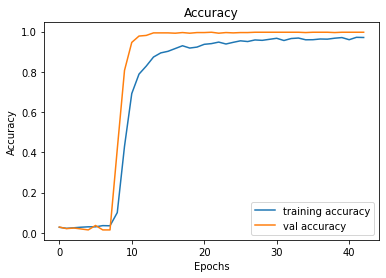

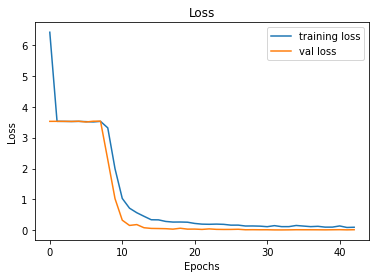

In [11]:
if __name__ == "__main__":
    import sys
    
    app = QtWidgets.QApplication(sys.argv)
    MainWindow = QtWidgets.QMainWindow()
    ui = Ui_MainWindow()
    ui.setupUi(MainWindow)
    MainWindow.show()
    sys.exit(app.exec_())

# 4. Validation

In [11]:
if __name__ == "__main__":
    import sys
    
    app = QtWidgets.QApplication(sys.argv)
    MainWindow = QtWidgets.QMainWindow()
    ui = Ui_MainWindow()
    ui.setupUi(MainWindow)
    MainWindow.show()
    sys.exit(app.exec_())

C:/Users/sami/Pantech/Day 15/Dataset/val/ALA/G2.jpg
Loading a model from the disk
C:/Users/sami/Pantech/Day 15/Dataset/val/ALA/G2.jpg
ALA
C:/Users/sami/Pantech/Day 15/Dataset/val/DA/G2.jpg
Loading a model from the disk
C:/Users/sami/Pantech/Day 15/Dataset/val/DA/G2.jpg
DA
C:/Users/sami/Pantech/Day 15/Dataset/val/M/G6.jpg
Loading a model from the disk
C:/Users/sami/Pantech/Day 15/Dataset/val/M/G6.jpg
M


SystemExit: 0

C:\Users\sami\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3425: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# 5. End Results

- We have successfully trained the Gujrati Character Recognition Model using CNN.
- We got accuracy of about **97.08%** on training data while **99.68** on validation data. This shows that our model is not over fitting & predicting the exact class to which it belongs.

# Thank You!!!